## Getting started 
* Read the data.
* split into train-test sets.
* fit the model to the train data.
* predict the test data.

In [1]:
import dogs_vs_cats as dvc
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_files = dvc.image_files()
perm = np.random.permutation(len(image_files))

# Shuffle the files
# Why np.array?--> (indexing with array of ints is not allowed for lists! try it anyway!)
image_files = np.array(image_files)[perm]


test_files = image_files[23000:]
train_files = image_files[:23000]

data file train.zip has already been downloaded
Data has already been extracted


In [3]:
train_features,train_labels = dvc.sample_image_set(train_files,n_images=500,image_size=(33,33,1))

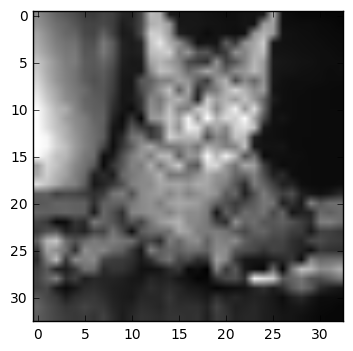

In [19]:
plt.imshow(train_features[11].reshape(33,33),cmap="gray")

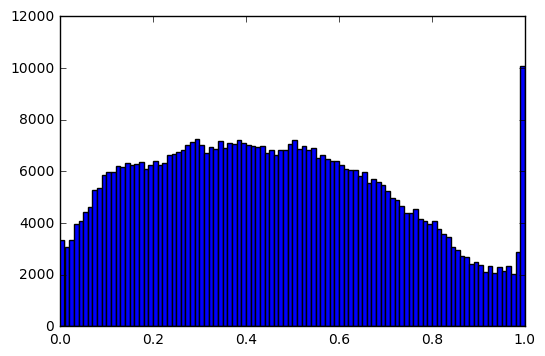

In [5]:
_ = plt.hist(train_features.ravel(),bins=100)

### Fit & test support vector machine classifier
Doc of the function: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

Mathematical formulation: http://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation


In [6]:
from sklearn import svm

classifier = svm.SVC(verbose=True)
classifier.fit(train_features,train_labels)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [7]:
test_features,test_labels = dvc.sample_image_set(test_files,n_images=400,image_size=(33,33,1))

In [8]:
test_preds = classifier.predict(test_features)
np.sum(test_preds == test_labels)/len(test_labels)

0.48249999999999998

In [9]:
# Equivalent to:
classifier.score(test_features,test_labels)

0.48249999999999998

In [10]:
classifier.score(train_features,train_labels)

0.54200000000000004

### Hyper-parameter estimation with CV
http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html

In [11]:
tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}
    

In [20]:
from sklearn.grid_search import GridSearchCV

clf = GridSearchCV(svm.SVC(C=1), tuned_parameters, cv=5,n_jobs=-1,verbose=True)
clf.fit(train_features, train_labels)

clf.best_estimator_


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.3s finished


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
clf.score(train_features,train_labels)

1.0

In [22]:
clf.score(test_features,test_labels) # :(

0.55000000000000004

### Confussion Matrix

In [16]:
from sklearn import metrics
test_preds = clf.predict(test_features)
metrics.confusion_matrix(test_labels, test_preds)

array([[108,  99],
       [ 81, 112]])

### ROC 
http://scikit-learn.org/0.17/auto_examples/model_selection/plot_roc_crossval.html#example-model-selection-plot-roc-crossval-py


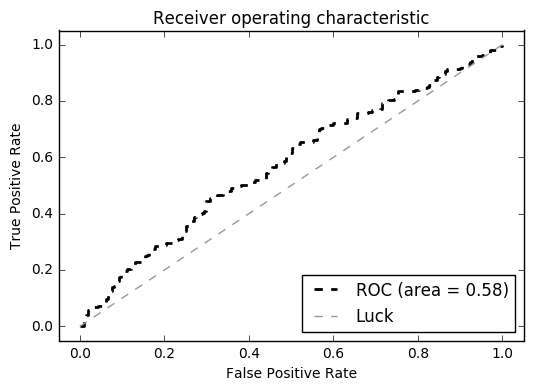

In [17]:
from sklearn import metrics
test_scores = clf.decision_function(test_features)
fpr, tpr, thresholds = metrics.roc_curve(test_labels, test_scores)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'k--',
         label='ROC (area = %0.2f)' % roc_auc, lw=2)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

### Exercise 7
Train a different classifier. http://scikit-learn.org/stable/supervised_learning.html
